In [1]:
import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from functools import partial

In [2]:
def read_all_results(dir_path):
    paths = os.listdir(dir_path)
    last_gens = []
    for i in range(len(paths)):
        path = dir_path + paths[i]
        try:
            last_gen = sorted(map(lambda x: x.split("_"), 
                            os.listdir(f"{path}/individuals/")), 
                            key=lambda x: int(x[1].split(".")[0]))[-1][-1][:-4]
            print(f"{i+1}: Path: {paths[i]}, last generation: {int(last_gen)}")
            last_gens.append(int(last_gen))
        except:
            continue
    return paths, last_gens

In [3]:
dir_path = "results/"
paths, last_gens = read_all_results(dir_path)

1: Path: GA_2021_06_02_01_48_33, last generation: 24
2: Path: GA_2021_06_02_01_49_34, last generation: 18
3: Path: GA_2021_06_02_01_45_54, last generation: 23
4: Path: GA_2021_06_02_01_49_10, last generation: 51
5: Path: GA_2021_06_02_12_54_05, last generation: 6
6: Path: GA_2021_06_02_01_49_20, last generation: 17
7: Path: GA_2021_06_02_01_45_41, last generation: 31
8: Path: GA_2021_06_02_01_48_43, last generation: 37
9: Path: GA_2021_06_02_01_48_23, last generation: 13


In [4]:
run = 5
path = dir_path + paths[run-1]
with open(path + "/run_params.json", "r") as file:
    print(file.read())
    file.close()

{
    "objective": "infected",
    "simulations": 15,
    "process": {
        "horizon": 74,
        "decision_period": 28,
        "policy": "weighted"
    },
    "population_size": 30,
    "random_individuals": false,
    "min_generations": 30
}


## Individual results

In [5]:
gen = 5
individuals_path =  f"{path}/individuals/individuals_{gen}.pkl"
individuals = utils.read_pickle(individuals_path)

In [6]:
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
print("Strategy_count:")
print(f"{utils.tcolors.BOLD}{'#':<3} {'U':<5}{'D':<5}{'N':<5}{utils.tcolors.ENDC}")
for trend_count in range(6):
    strategy_count = individuals[0].strategy_count
    print(f"{trend_count+1:<2}| {strategy_count['U'][trend_count]:<5}{strategy_count['D'][trend_count]:<5}{strategy_count['N'][trend_count]:<5}")
print()
for ix, i in enumerate(sorted(individuals, key=lambda x: x.mean_score)):
    print(f"{utils.tcolors.BOLD}{ordinal(ix+1)} place:{utils.tcolors.ENDC}")
    print(f"ID: {i.ID}")
    print(f"Score: {np.round(i.mean_score, 3)}")
    print(f"Genes:\n{np.round(i.genes, 3)}")
    print()

Strategy_count:
#   U    D    N    
1 | 36   36   36   
2 | 20   33   36   
3 | 10   16   36   
4 | 1    6    26   
5 | 0    1    14   
6 | 0    0    3    

1st place:
ID: gen_3_013
Score: 113065.586
Genes:
[[[0.    0.042 0.917 0.042 0.   ]
  [0.    0.045 0.955 0.    0.   ]
  [0.    0.042 0.917 0.042 0.   ]]

 [[0.    0.042 0.917 0.042 0.   ]
  [0.    0.042 0.917 0.042 0.   ]
  [0.    0.042 0.917 0.042 0.   ]]

 [[0.038 0.038 0.885 0.038 0.   ]
  [0.    0.042 0.917 0.042 0.   ]
  [0.    0.042 0.917 0.042 0.   ]]]

2nd place:
ID: gen_2_002
Score: 113792.225
Genes:
[[[0.    0.    1.    0.    0.   ]
  [0.    0.    1.    0.    0.   ]
  [0.    0.    0.909 0.091 0.   ]]

 [[0.    0.    0.923 0.077 0.   ]
  [0.    0.    0.923 0.077 0.   ]
  [0.    0.    0.833 0.083 0.083]]

 [[0.    0.    0.929 0.071 0.   ]
  [0.    0.    0.923 0.077 0.   ]
  [0.    0.    0.909 0.091 0.   ]]]

3rd place:
ID: gen_0_002
Score: 114490.601
Genes:
[[[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]]

 [[0. 0.

In [7]:
genes = np.sum(individuals[0].genes, axis=(0,1))
norm = np.sum(genes)
norm_genes = np.divide(genes, norm)
print(norm_genes)

[0.0042735  0.04173142 0.91731417 0.03668091 0.        ]


## Generation Means

In [8]:
generation_scores = os.listdir(path+"/final_scores/")
final_scores = []
for score in sorted(generation_scores, key=lambda x: int(x.split("_")[2][:-4])):
    final_scores.append(utils.read_pickle(path+"/final_scores/"+score))

generation_means = defaultdict(list)
for gen_scores in final_scores:
    gen_individual_means = defaultdict(list)
    for individual in gen_scores.keys():
        for objective, scores in gen_scores[individual].items():
            gen_individual_means[objective].append(np.mean(scores))
    for objective, scores in gen_individual_means.items():
        generation_means[objective].append(np.mean(scores))
generation_means = dict(generation_means)
results = pd.DataFrame(generation_means)
results.index.rename("generation", inplace=True)
results

,deaths,infected,weighted,yll
generation,,,,
0,1313.331845,132412.578723,2637.457632,17561.442222
1,1310.680154,132056.907272,2631.249227,17514.270968
2,1306.875435,131570.890532,2622.584340,17451.295833
3,1304.392941,131187.178456,2616.264726,17404.080808
4,1302.140122,130812.200705,2610.262129,17358.223529
5,1299.695310,130446.714436,2604.162455,17314.041905
6,1297.099289,130083.551303,2597.934802,17268.537037


In [9]:
for gen in range(len(final_scores)):
    for individual in final_scores[gen]:
        for objective in final_scores[gen][individual]:
            if len(final_scores[gen][individual][objective]) > 15:
                print(f"{gen} {individual} {objective} {len(final_scores[gen][individual][objective])}")

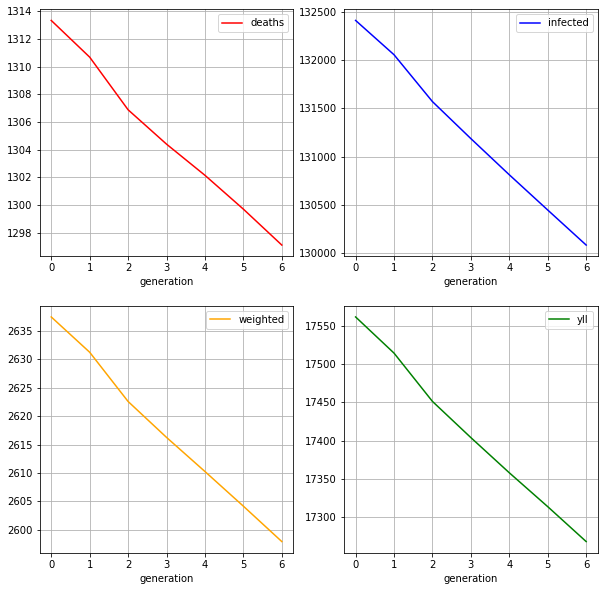

In [10]:
colors = ["red", "blue", "orange", "green"]
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i, col in enumerate(results.columns):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.legend()
    ax.grid()
plt.show()

## Best individual

In [11]:
filenames = os.listdir(path+"/best_individuals/")
best_individuals = []
for individual in sorted(filenames, key=lambda x: int(x.split("_")[2][:-4])):
    best_individuals.append(utils.read_pickle(path+"/best_individuals/"+individual))

best_individual_scores = {gen: {"individual": None,"deaths":None, "infected":None, "weighted":None, "yll":None} for gen in range(len(best_individuals))}
for i, individual in enumerate(best_individuals):
    best_individual_scores[i]["individual"] = individual
    for obj in ["deaths", "infected", "weighted", "yll"]:
        best_individual_scores[i][obj] = np.mean(final_scores[i][individual.ID][obj])
results = pd.DataFrame(dict(best_individual_scores)).T
results.index.rename("generation", inplace=True)
results

,individual,deaths,infected,weighted,yll
generation,,,,,
0,gen_0_002,1265.227059,121504.484823,2480.271907,16292.266667
1,gen_0_002,1265.227059,121504.484823,2480.271907,16292.266667
2,gen_2_002,1188.92913,116504.371588,2353.972845,15499.066667
3,gen_2_002,1188.92913,116504.371588,2353.972845,15499.066667
4,gen_2_002,1188.92913,116504.371588,2353.972845,15499.066667
5,gen_2_002,1188.92913,116504.371588,2353.972845,15499.066667
6,gen_2_002,1188.92913,116504.371588,2353.972845,15499.066667


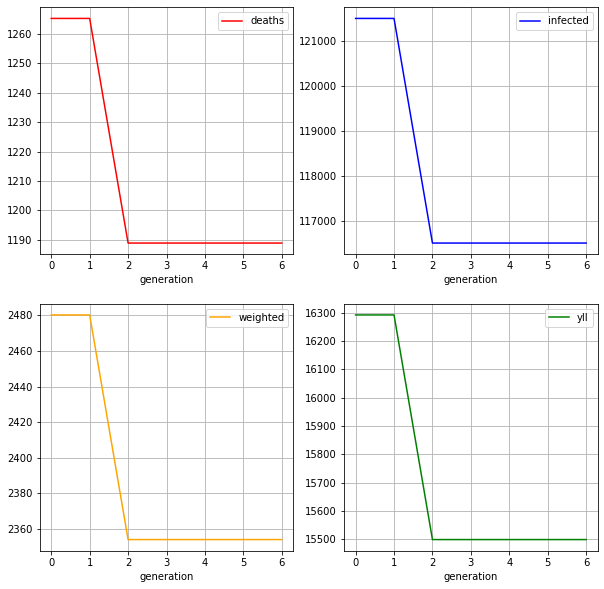

In [12]:
colors = ["red", "blue", "orange", "green"]
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i, col in enumerate(results.columns[1:]):
    ax = axs[i//2][i%2]
    results[col].plot(label=col, color=colors[i], ax=ax)
    ax.legend()
    ax.grid()
plt.show()